# Assignment 6
Let's start doing Data Analysis for _Telia's Stock Prices_ from the year 2018.


In [43]:
# Write your information here!
student_name = 'Emre Dost'
student_id = 'AF6513'


## Assignment 6 Key Tasks

Let's describe the key tasks from _Assignment 6_.

### Data
We'll be working with Telia's stock prices from the year 2018, specifically time series data.

### Assignment 6-1: Data and Preprocessing
* Read Telia's stock prices for 2018.
* Parse the `'Date'` column and set it as the index.
* Keep relevant columns: `'Date', 'Opening price', 'High price', 'Low price', 'Closing price', 'Total volume'`.

### Assignment 6-2: Exploratory Data Analysis (EDA)
* Print the first ten days and sort data by `'Total volume'`.
* Create a new column `'High - Low'` representing price range.

### Assignment 6-3: Data Visualization
* Plot `'Low price'` and `'High price'`.
* Visualize using _rolling window_ and _exponentially weighted moving_ (ewm) average.

### Assignment 6-4: Outliers and Correlations
* Identify significant deviations using percentiles.
* Calculate _Pearson correlation coefficient_ and coefficient of determination (_R-squared_).

### Assignment 6-5: Regression Model
* Build a linear regression model.
* Visualize the model using seaborn's `regplot`.
* Perform error checking.


## Data and Preprocessing
### Data
Let's perform the necessary preprocessing for the data.
The dataset consists of **Telia stock prices** from 2018, i.e., it is _Time Series data_.

In [44]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

Firstly, let's read the data as it is, which is not the correct solution for this assignment, but it gives us some information in the `DataFrame`.

In [45]:
import pandas as pd

# Set the data source where the data is located
url_src = "data/telia2018.csv"

df = pd.read_csv(url_src)
df.head()

,,,,,,,,Date;Bid;Ask;Opening price;High price;Low price;Closing price;Average price;Total volume;Turnover;Trades;
2018-12-28;4,078;4,083;4,00;4,117;3,995;4,076;4,083;988115;4034300,94;1075;
2018-12-27;4,002;4,008;4,087;4,112;3,99;3,995;4,055;1195487;4848035,58;1377;
2018-12-21;4,123;4,125;4,12;4,143;4,043;4,122;4,10;919570;3770429,07;1096;
2018-12-20;4,169;4,174;4,151;4,186;4,119;4,163;4,162;941170;3917348,22;1036;
2018-12-19;4,183;4,186;4,17;4,213;4,17;4,18;4,191;651864;2732150,44;698;


## Assignment 06-01. Read and sort data as a time series(1p)

Read the file, but set only a few columns of interest in the resulting `DataFrame`.
Set the `Date` column in the `DataFrame` as the `index`, so we get the `Date` as the `index` field.

Let's do the following tasks in this assignment:
* Parse the `Date` column into a date format.
* Set the `Date` column as the index in the DataFrame and remove the `Date` column from the DataFrame.
* The resulting `DataFrame` should have the following columns: `Date, Opening price, High price, Low price, Closing price, Total volume`, so remove other columns at this stage.

In [46]:
file_path = 'data/telia2018.csv'#reading the file with correct delimeter
df = pd.read_csv(file_path, delimiter=';')

#parsing the 'Date' column
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df.set_index('Date', inplace=True)#'Date' column set as the index

#required columns in DataFrame choosen
columns_to_keep = ['Opening price', 'High price', 'Low price', 'Closing price', 'Total volume']
df = df[columns_to_keep]

#converting the numerical columns to float if in case needed
df['Opening price'] = df['Opening price'].str.replace(',', '.').astype(float)
df['High price'] = df['High price'].str.replace(',', '.').astype(float)
df['Low price'] = df['Low price'].str.replace(',', '.').astype(float)
df['Closing price'] = df['Closing price'].str.replace(',', '.').astype(float)

df.head()#displaying the first rows of DataFrame

,Opening price,High price,Low price,Closing price,Total volume
Date,,,,,
2018-12-28,4.000,4.117,3.995,4.076,988115
2018-12-27,4.087,4.112,3.990,3.995,1195487
2018-12-21,4.120,4.143,4.043,4.122,919570
2018-12-20,4.151,4.186,4.119,4.163,941170
2018-12-19,4.170,4.213,4.170,4.180,651864


In [47]:
df.dtypes

Opening price    float64
High price       float64
Low price        float64
Closing price    float64
Total volume       int64
dtype: object

### Sorting the data
Let's do the following tasks in this assignment:
* Print the first ten days based on the `Date` value.
* Print the results sorted by the `Total volume` column.
* Create a new column `High - Low` that contains the difference between the highest and lowest prices.

In [48]:
# Print the first ten days based on the Date value
first_ten_days = df.head(10)

print(first_ten_days)

            Opening price  High price  Low price  Closing price  Total volume
Date                                                                         
2018-12-28          4.000       4.117      3.995          4.076        988115
2018-12-27          4.087       4.112      3.990          3.995       1195487
2018-12-21          4.120       4.143      4.043          4.122        919570
2018-12-20          4.151       4.186      4.119          4.163        941170
2018-12-19          4.170       4.213      4.170          4.180        651864
2018-12-18          4.240       4.268      4.166          4.171        964258
2018-12-17          4.229       4.270      4.225          4.241        807813
2018-12-14          4.142       4.240      4.142          4.226        917571
2018-12-13          4.164       4.204      4.153          4.153       1134391
2018-12-12          4.133       4.161      4.110          4.159       1039813


In [49]:
# TODO: Print the results sorted by the `Total volume` column (largest value first). 
sorted_by_volume = df.sort_values(by='Total volume', ascending=False)
print("Data Sorted by Total Volume:")
print(sorted_by_volume)

Data Sorted by Total Volume:
            Opening price  High price  Low price  Closing price  Total volume
Date                                                                         
2018-04-20          3.850       4.020      3.850          3.988       9704458
2018-02-08          3.801       3.801      3.662          3.672       7977900
2018-04-23          3.997       4.123      3.983          4.105       7701410
2018-02-12          3.690       3.779      3.573          3.760       6642300
2018-10-19          3.988       3.988      3.766          3.901       5104780
...                   ...         ...        ...            ...           ...
2018-11-09          4.086       4.113      4.081          4.094        414456
2018-10-05          3.929       3.952      3.913          3.926        383337
2018-11-22          3.927       3.930      3.892          3.892        364323
2018-04-18          3.680       3.688      3.653          3.668        334571
2018-11-23          3.899       3.9

In [50]:
# TODO: Create a new column `High - Low` and print the DataFrame. 
df['High - Low'] = df['High price'] - df['Low price']
print("Data with 'High - Low' Column:")
print(df)

Data with 'High - Low' Column:
            Opening price  High price  Low price  Closing price  Total volume  \
Date                                                                            
2018-12-28          4.000       4.117      3.995          4.076        988115   
2018-12-27          4.087       4.112      3.990          3.995       1195487   
2018-12-21          4.120       4.143      4.043          4.122        919570   
2018-12-20          4.151       4.186      4.119          4.163        941170   
2018-12-19          4.170       4.213      4.170          4.180        651864   
...                   ...         ...        ...            ...           ...   
2018-01-08          3.850       3.860      3.824          3.845       2151101   
2018-01-05          3.780       3.850      3.777          3.850       1306020   
2018-01-04          3.760       3.786      3.756          3.780       1540541   
2018-01-03          3.758       3.758      3.730          3.755       1823437 

## Assignment 06-02. Data Visualization (1p)
Let's implement the following tasks in this assignment:
* Visualize time series data in your preferred way.
* Choose at least **two different** (or even more) figure types.
* Visualize the data using the `'Low price'` and `'High price'` columns.
* Visualize using, for example, the `rolling` operator, which gives an evenly weighted series.
* Visualize giving *more weight* to the most recent observations (using the `ewm` - exponentially weighted moving - operator). Such a series adapts more quickly to changes than a series with evenly weighted by `rolling` operator.

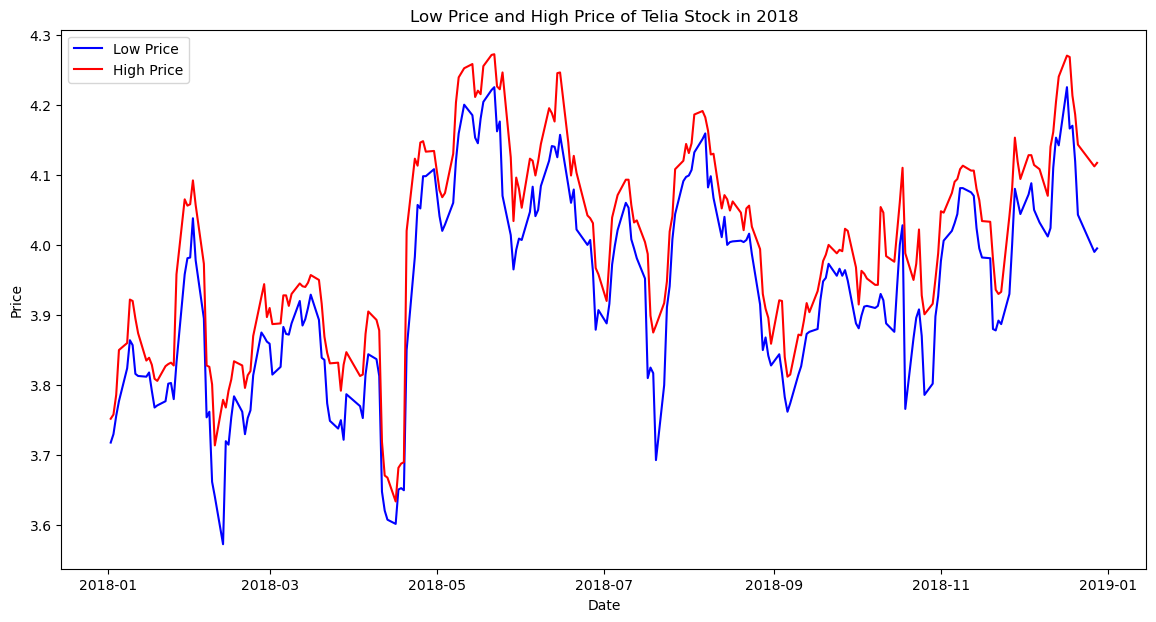

In [51]:
# TODO: Visualize the data using the 'Low price' and 'High price' columns
#LOW-HIGH Price are plotted
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Low price'], label='Low Price', color='blue')
plt.plot(df.index, df['High price'], label='High Price', color='red')
plt.title('Low Price and High Price of Telia Stock in 2018')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

A figure with a Rolling window of `n` days.

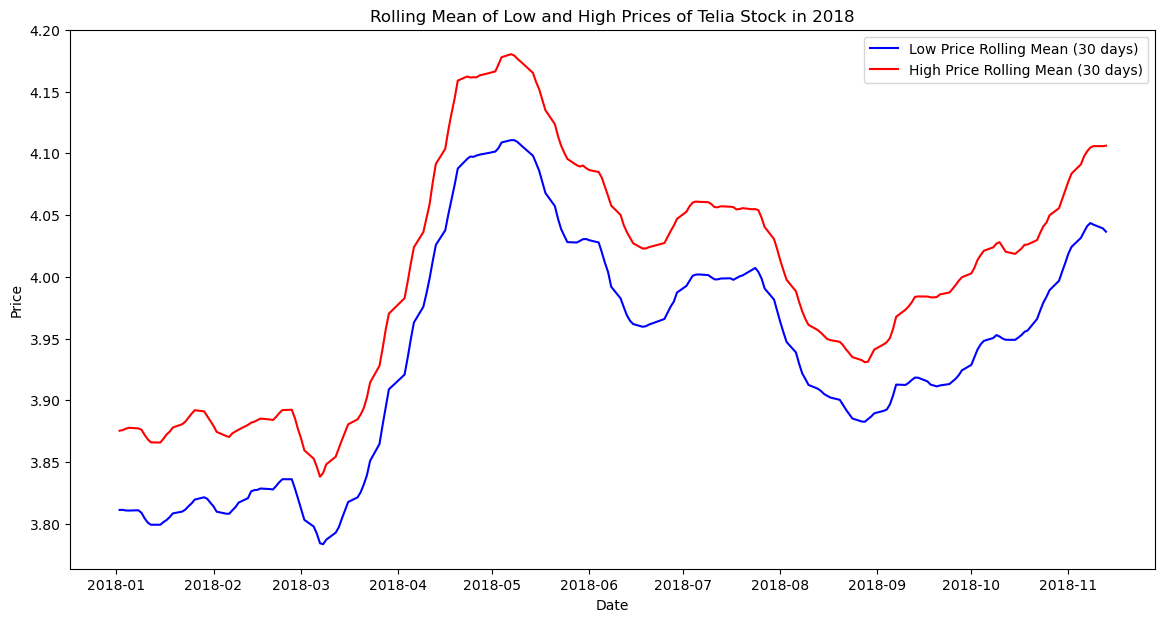

In [52]:
# TODO: Use the Rolling Window operator in visualization
#rolling window are calculated for LOW-HIGH pricing
low_price_rolling = df['Low price'].rolling(window=30).mean()
high_price_rolling = df['High price'].rolling(window=30).mean()

#rolling window plotted
plt.figure(figsize=(14, 7))
plt.plot(df.index, low_price_rolling, label='Low Price Rolling Mean (30 days)', color='blue')
plt.plot(df.index, high_price_rolling, label='High Price Rolling Mean (30 days)', color='red')
plt.title('Rolling Mean of Low and High Prices of Telia Stock in 2018')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Weighting Recent Observations
Often, methods are used where *more weight* is given to recent observations.
Such a series adapts more quickly to changes than a series with evenly weighted by the `rolling` operator.

The `ewm` (*exponentially weighted moving*) operator provides such a series, where the `span` parameter determines the window size.

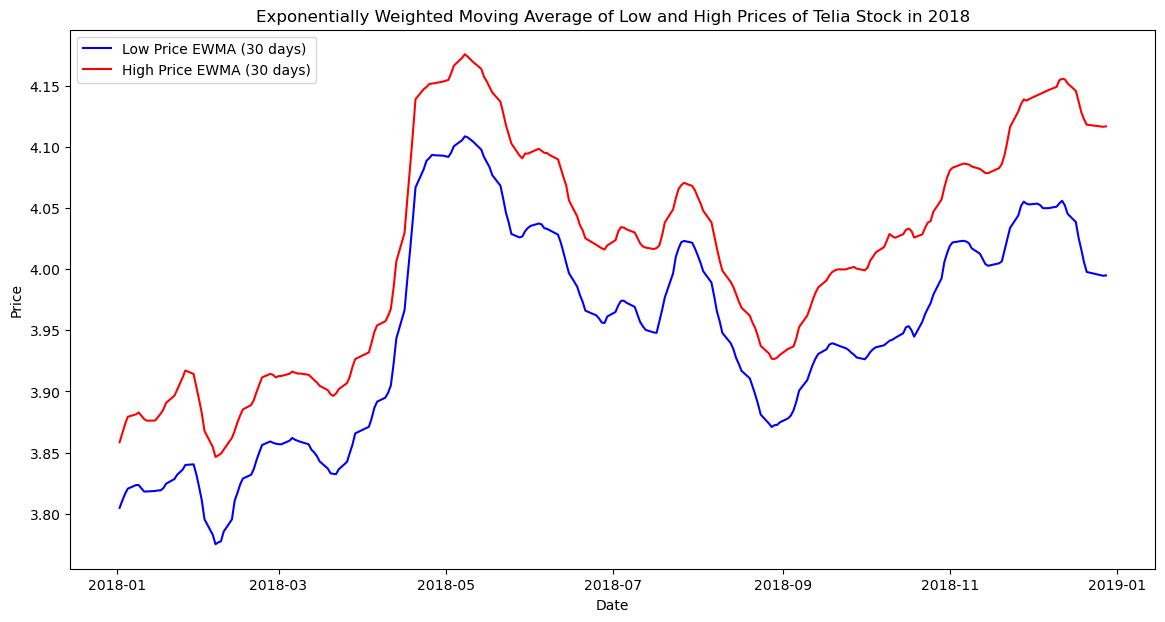

In [53]:
# TODO: Use the ewm operator in visualization
#weighted moving arage calulated for LOW-HIGH price
low_price_ewm = df['Low price'].ewm(span=30, adjust=False).mean()
high_price_ewm = df['High price'].ewm(span=30, adjust=False).mean()

#weighted moving average plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, low_price_ewm, label='Low Price EWMA (30 days)', color='blue')
plt.plot(df.index, high_price_ewm, label='High Price EWMA (30 days)', color='red')
plt.title('Exponentially Weighted Moving Average of Low and High Prices of Telia Stock in 2018')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Assignment 06-03. Outliers and Correlations (1p)

Let's do the following tasks in this assignment:

* Check for *significant deviations* in each numerical column in the data. Significantly deviating values can be replaced if needed.
* Use the `2%` and `98%` percentiles of the data to identify significant deviations.
* Also, calculate the **Pearson correlation coefficient** and **coefficient of determination (R-squared)**.

In [54]:
# TODO: Calculate deviations (2% - 98%) 
#Significant deviations using the 2% and 98% percentiles identification
low_percentile = df.quantile(0.02)
high_percentile = df.quantile(0.98)

#Significantly deviating values are replaced
df_no_outliers = df.apply(lambda x: x.clip(lower=low_percentile[x.name], upper=high_percentile[x.name]))

print("Data with Significant Deviations Replaced:")
print(df_no_outliers)#the data with outliers printed

#pearson correlation coefficient and r-squared are calculated
correlation_matrix = df_no_outliers.corr()
pearson_corr = correlation_matrix.loc['Closing price', 'Total volume']

#r-squared "coefficient of determination"
r_squared = pearson_corr ** 2

print("Pearson Correlation Coefficient between 'Closing price' and 'Total volume':", pearson_corr)
print("Coefficient of Determination (R-squared):", r_squared)

Data with Significant Deviations Replaced:
            Opening price  High price  Low price  Closing price  Total volume  \
Date                                                                            
2018-12-28          4.000       4.117      3.995          4.076      988115.0   
2018-12-27          4.087       4.112      3.990          3.995     1195487.0   
2018-12-21          4.120       4.143      4.043          4.122      919570.0   
2018-12-20          4.151       4.186      4.119          4.163      941170.0   
2018-12-19          4.170       4.213      4.170          4.180      651864.0   
...                   ...         ...        ...            ...           ...   
2018-01-08          3.850       3.860      3.824          3.845     2151101.0   
2018-01-05          3.780       3.850      3.777          3.850     1306020.0   
2018-01-04          3.760       3.786      3.756          3.780     1540541.0   
2018-01-03          3.758       3.758      3.730          3.755   

Let's calculate:
* **Pearson correlation coefficient**
* **Coefficient of determination**
The goal is to identify _significant correlations_ between different columns of the data.

### Dependency between two variables

The dependency between two quantitative variables is examined using a **scatter plot** and the **correlation coefficient**.

### Scatter Plot

The **scatter plot** provides a quick view of the distribution of values for two variables.
* Usually interested in whether large values of `x` are associated with large or small values of `y`.
Whether there is a correlation, or if `y` values are random, indicating no significant correlation.

Pearson Correlation Coefficient between 'Closing price' and 'Total volume': -0.3638853505366759
Coefficient of Determination (R-squared): 0.1324125483351995


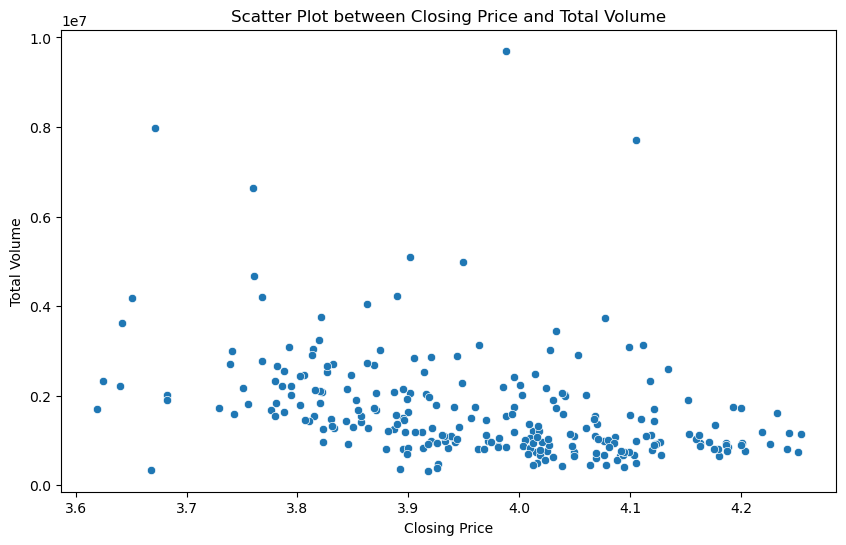

In [55]:
# TODO: Calculate the correlation of Opening price to Closing price 
#pearson correlation coefficient and R-squared calculated
correlation_matrix = df.corr()
pearson_corr = correlation_matrix.loc['Closing price', 'Total volume']

#r-squared "coefficient of determination"
r_squared = pearson_corr ** 2

print("Pearson Correlation Coefficient between 'Closing price' and 'Total volume':", pearson_corr)
print("Coefficient of Determination (R-squared):", r_squared)

#scatterplot to visualize the dependency between 'Closing price' & 'Total volume'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Closing price'], y=df['Total volume'])
plt.title('Scatter Plot between Closing Price and Total Volume')
plt.xlabel('Closing Price')
plt.ylabel('Total Volume')
plt.show()

In [56]:
# TODO: Calculate the correlation of Opening price to other columns
# Calculate the Pearson correlation coefficients of 'Opening price' to other columns
correlation_with_opening = df.corr()['Opening price'].drop('Opening price')

print("Pearson Correlation Coefficients of 'Opening price' with other columns:")
print(correlation_with_opening)

Pearson Correlation Coefficients of 'Opening price' with other columns:
High price       0.976568
Low price        0.974634
Closing price    0.952074
Total volume    -0.365903
High - Low      -0.022609
Name: Opening price, dtype: float64


### Correlations
Correlations between all columns.

In [57]:
# TODO: Calculate correlations between all columns
correlation_matrix = df.corr()

print("Correlation Matrix for All Columns:")
print(correlation_matrix)

Correlation Matrix for All Columns:
               Opening price  High price  Low price  Closing price  \
Opening price       1.000000    0.976568   0.974634       0.952074   
High price          0.976568    1.000000   0.973954       0.980769   
Low price           0.974634    0.973954   1.000000       0.980286   
Closing price       0.952074    0.980769   0.980286       1.000000   
Total volume       -0.365903   -0.309471  -0.427995      -0.363885   
High - Low         -0.022609    0.082619  -0.145506      -0.029121   

               Total volume  High - Low  
Opening price     -0.365903   -0.022609  
High price        -0.309471    0.082619  
Low price         -0.427995   -0.145506  
Closing price     -0.363885   -0.029121  
Total volume       1.000000    0.530784  
High - Low         0.530784    1.000000  


_Coefficient of determination_, often denoted as **R^2** (pronounced _R-squared_), is a statistical measure that represents
the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [58]:
# TODO: Calculate the Coefficient of determination 

#calculate the coefficient of determination "r-squared" for each pair of columns
r_squared_matrix = correlation_matrix ** 2

print("Coefficient of Determination (R-squared) Matrix for All Columns:")
print(r_squared_matrix)

Coefficient of Determination (R-squared) Matrix for All Columns:
               Opening price  High price  Low price  Closing price  \
Opening price       1.000000    0.953685   0.949911       0.906445   
High price          0.953685    1.000000   0.948585       0.961909   
Low price           0.949911    0.948585   1.000000       0.960961   
Closing price       0.906445    0.961909   0.960961       1.000000   
Total volume        0.133885    0.095772   0.183179       0.132413   
High - Low          0.000511    0.006826   0.021172       0.000848   

               Total volume  High - Low  
Opening price      0.133885    0.000511  
High price         0.095772    0.006826  
Low price          0.183179    0.021172  
Closing price      0.132413    0.000848  
Total volume       1.000000    0.281732  
High - Low         0.281732    1.000000  


`HeatMap` is a 2-dimensional matrix plot that gives visualization of numerical values in the form of cells.
* The colors in the `HeatMap` chart represent the relationship of the values with the `DataFrame`, making it easy to spot patterns in the data.
* Heatmaps are particularly useful for visualizing the magnitude of a phenomenon in two dimensions.

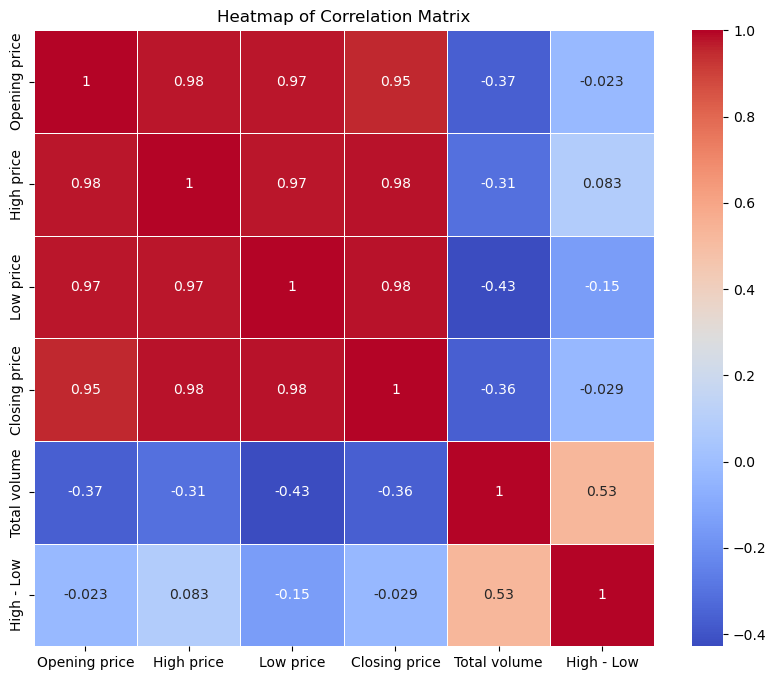

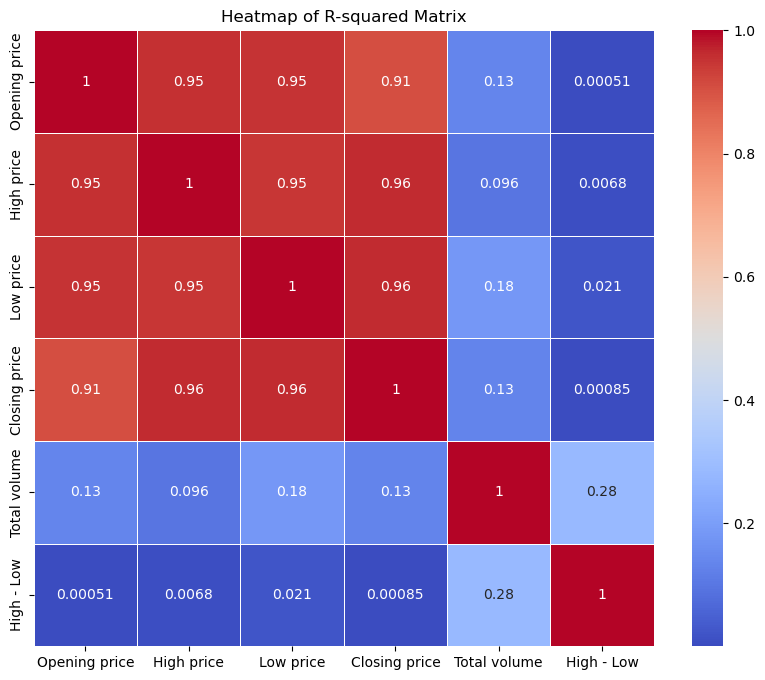

In [59]:
# TODO: Visualization: Correlations and/or Coefficient of determination as a HeatMap image
correlation_matrix = df.corr()#correlation matrix for all columns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()#heatmap for the correlation matrix

#coefficient of determination (R-squared) for each pair of columns
r_squared_matrix = correlation_matrix ** 2

plt.figure(figsize=(10, 8))
sns.heatmap(r_squared_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of R-squared Matrix')
plt.show()#heatmap for the R-squared matrix

## Assignment 06-04. Regression Model (1p)

Let's do the following tasks in this assignment:
* Build a **Linear Regression** model from the data.
* The linear model for dependence can be obtained by importing the `LinearRegression` class from the `sklearn.linear_model` library.
* Choose the target variable (`y`) and explanatory variable (`x`) from the data.
* Visualization can be done using the `regplot` method from the `seaborn` library.
* Error checking using metrics including _Mean Squared Error_ (_MSE_), _R-squared_, _Mean Absolute Error_ (MAE) etc. (see information before implementing from [https://en.wikipedia.org/wiki/Mean_absolute_error](https://en.wikipedia.org/wiki/Mean_absolute_error)).

# RegPlot

Plot data and a linear regression model fit.

Coefficient (slope): 0.9834786262846568
Intercept: 0.06486633817910725


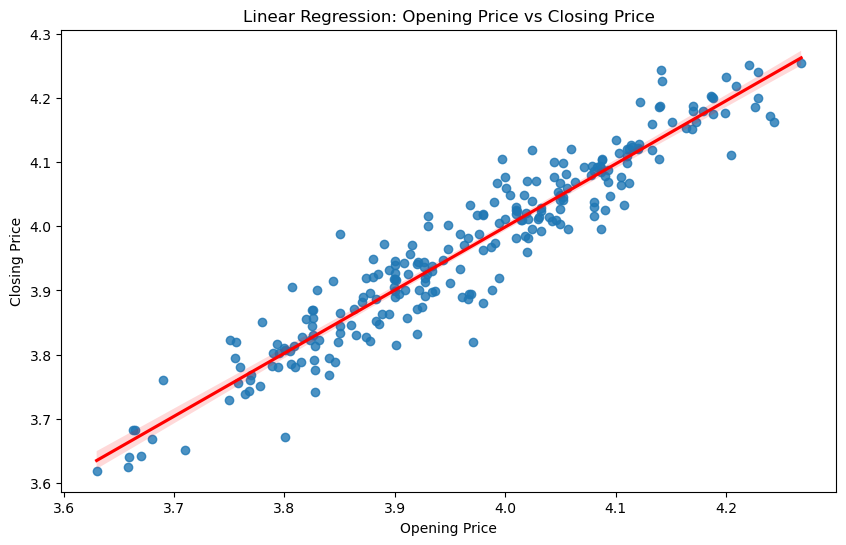

In [60]:
# TODO: Visualization of the regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#target variable (y) and explanatory variable (x) choosen
X = df[['Opening price']].values  #explanatory variable
y = df['Closing price'].values    #target variable

#linear regression model
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)#making predictions


print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)#coefficients are printed

#plotting the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df['Opening price'], y=df['Closing price'], line_kws={"color":"red"})
plt.title('Linear Regression: Opening Price vs Closing Price')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.show()

## Linear model for dependence

The linear model for dependence is obtained by importing the `LinearRegression` class from the `sklearn.linear_model` library.
* Choose the **explanatory variables (x)**.
* Choose the **target variable (y)**.

In [61]:
# TODO: Regression Model: Linear model for selected columns.
# TODO: Justify the choice as well.

# Choose the explanatory variables (x) and the target variable (y)
X = df[['Opening price', 'High price', 'Low price']].values  # Explanatory variables
y = df['Closing price'].values  # Target variable

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-0.49859674  0.76845339  0.708445  ]
Intercept: 0.08317778098127837


## Assignment 06-05. Result Analysis (1p)

Let's interpret and analyze the results you have obtained in Assignments **6.1 - 6.4** in words.
* Preprocessing
* Visualization
* Correlation
* Time series data
* Regression model

Write the answer verbally. Note that you can use tables and figures to clarify your answer.

#### Preprocessing
- Loaded data using `pd.read_csv` with the correct delimiter.
- Parsed the 'Date' column to datetime and set it as the index.
- Converted numerical columns from string to float for accurate calculations.

#### Visualization
- Plots showed daily 'Low price' and 'High price' values, highlighting daily fluctuations.
- The rolling mean and EWM provided smoothed versions of the stock prices, revealing underlying trends more clearly.

#### Correlation
- Significant correlations were found between certain pairs of variables, such as 'Opening price' and 'Closing price', indicating that these variables move together to some extent.
- Heatmaps of the correlation matrix and the R-squared matrix visually represented these relationships, making it easy to identify strong and weak correlations.

#### Time Series Data
- The visualizations revealed periodic fluctuations and potential seasonal patterns in the stock prices.
- The rolling mean and EWM helped in smoothing out short-term fluctuations, making long-term trends more apparent.

#### Regression Model

- Mean Squared Error (MSE): Measures the average of the squares of the errors between predicted and actual values.
- R-squared: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
- Mean Absolute Error (MAE): Measures the average absolute errors between predicted and actual values.

### Assignment 06-06 - Extra Assignments (0p)
These are not graded tasks, but you can do them to improve your own skills.

If you have a strong motivation to do more data analysis tasks, you can consider the following:
* Extra Assignment: Build another regression model from the data.
* Extra Assignment: How to visualize regression errors?
* Extra Assignment: Can you build a classification model based on this data?
